<a href="https://colab.research.google.com/github/Karim-mansour/machine-learning/blob/master/dogs_and_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , Flatten , Dropout , MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator ,load_img,img_to_array
import os 
from keras import backend as K
from keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np
import matplotlib as plt 
from matplotlib import pyplot as plt


In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random
import cv2
import os 
from keras.preprocessing import image
from keras import backend as K
from keras.preprocessing.image import img_to_array, load_img

**we use this code to download a zip file then extract then open it **
 

In [0]:
_URL='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip= tf.keras.utils.get_file('Cats_and_dogs.zip',_URL, extract=True)
PATH=os.path.join(os.path.dirname(path_to_zip),'cats_and_dogs_filtered')

In [0]:
train_dir=os.path.join(PATH,'train')
validation_dir=os.path.join(PATH,'validation')

In [0]:
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')
validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

In [0]:
num_cats_train= len (os.listdir(train_cats_dir))
num_dogs_train= len (os.listdir(train_dogs_dir))
num_cats_validation= len (os.listdir(validation_cats_dir))
num_dogs_validation=len (os.listdir(validation_dogs_dir))
total_train= num_cats_train+ num_dogs_train
total_validation = num_cats_validation + num_dogs_validation
print ('the number of train cats is ',num_cats_train)
print ('the number of train dogs is ',num_dogs_train)
print ('the number of validation cats is ', num_cats_validation)
print ('the number of validation dogs is ',num_dogs_validation)
print ('total train is ',total_train)
print ('total validation is ',total_validation)

the number of train cats is  1000
the number of train dogs is  1000
the number of validation cats is  500
the number of validation dogs is  500
total train is  2000
total validation is  1000


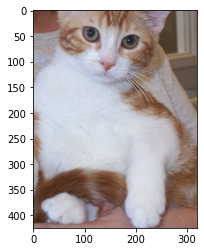

In [0]:
xs=9
cat=load_img('/root/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.%d.jpg'%xs)
plt.imshow(cat)

In [0]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150
dropout=.5


In [0]:
if K.image_data_format() == 'channels_first':        #We usually use channel first approach
    input_shape = (3, IMG_WIDTH, IMG_HEIGHT)
else:
    input_shape = (IMG_WIDTH, IMG_HEIGHT, 3)

**lets prepare our data to be used**

In [0]:
train_image_generator=ImageDataGenerator(rescale=1./255)
validation_image_generator=ImageDataGenerator(rescale=1./255)
test_image=ImageDataGenerator(rescale=1./255)
train_data_generator=train_image_generator.flow_from_directory(batch_size=batch_size ,directory=train_dir ,shuffle=True,target_size=(IMG_HEIGHT, IMG_WIDTH),classes=['cats','dogs'])
validation_data_generator=validation_image_generator.flow_from_directory(batch_size=batch_size , directory=validation_dir , shuffle=True,target_size=(IMG_HEIGHT,IMG_WIDTH),classes=['cats','dogs'])
test_data=test_image.flow_from_directory(batch_size=1, directory='/content/test_data_cat_dogs',shuffle=True , target_size=(IMG_HEIGHT,IMG_WIDTH) ,classes=['ok'])


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1 images belonging to 1 classes.


In [0]:
x_train,y_train = next(train_data_generator)
x_test,y_test = next(validation_data_generator)
x_ok,y_ok = next(test_data)




In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 341056)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               43655296  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [0]:
model.compile( Adam(lr=.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])





In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 341056)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               43655296  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [0]:
history=model.fit_generator(train_data_generator ,epochs=8 , steps_per_epoch=500 ,validation_steps=500   , validation_data=validation_data_generator)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/8
500/500 [==============================] - 450s 899ms/step - loss: 0.4706 - accuracy: 0.7771 - val_loss: 0.6042 - val_accuracy: 0.7062
Epoch 2/8
500/500 [==============================] - 445s 891ms/step - loss: 0.1183 - accuracy: 0.9725 - val_loss: 0.8466 - val_accuracy: 0.7040
Epoch 3/8
500/500 [==============================] - 444s 888ms/step - loss: 0.0379 - accuracy: 0.9941 - val_loss: 1.0998 - val_accuracy: 0.7118
Epoch 4/8
500/500 [==============================] - 438s 876ms/step - loss: 0.0204 - accuracy: 0.9960 - val_loss: 1.3526 - val_accuracy: 0.7121
Epoch 5/8
500/500 [==============================] - 441s 882ms/step - loss: 0.0146 - accuracy: 0.9966 - val_loss: 1.4814 - val_accuracy: 0.6961
Epoch 6/8
500/500 [==============================] - 439s 877ms/step - loss: 0.0116 - accuracy: 0.9969 - val_loss: 1.6247 - val_accuracy: 0.7060
Epoch 7/8
500/500 [==============================] - 4

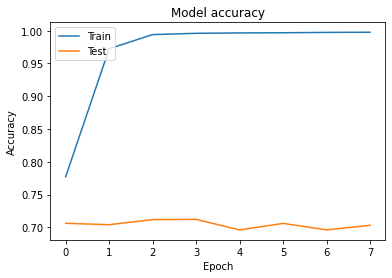

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
predictions=predictions=model.predict_generator(test_data,steps=1,verbose=0)

In [0]:
most_likely = predictions.argmax(1)
print(most_likely)

[1]


In [0]:
model.save('/dog_and_cat.h5')

In [0]:
from keras.model import load_model
new_model= load_model ('dogs_and_cat.h5')

In [0]:
new_model.summary()

In [0]:
new_model.get_weights()

In [0]:
new_model.optimizer

/content/test_data_cat_dogs
